In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as op

In [3]:
# Equations de kepler

def calculate_trajectory():
    t, M, u, theta, R, X, Y = [], [], [], [], [], [], []
    # Trajectoire
    for i in range(0,N+6):
        t.append(i * T_rev / N)
        M.append(2 * np.pi / T_rev * t[i])
        u.append(float(op.fsolve(lambda x : x - e * np.sin(x) - M[i], 0)))

        # coordonées
        theta.append( 2 * np.arctan((np.sqrt((1+e)/(1-e)) * np.tan(u[i] / 2))))
        R.append(a * (1 - e ** 2) / (1 + e * np.cos(theta[i])))
        ## Cartésiene
        X.append(R[i] * np.cos(theta[i]))
        Y.append(R[i] * np.sin(theta[i]))

    return t,M,u,theta,R,X,Y

# Vecteurs V et A

def calculate_speed(X,Y,t):
    vx, vy, v = [], [], []
    # Vecteurs V et A
    for i in range(0, N+5):
        # vecteur vitesse
        # méthode de dérivée numérique 
        # (Théorème des accroissements finis)
        # exemple: vx(t4) = x5-x3/t5-t3
        vx.append((X[i+1]-X[i-1])/(t[i+1]-t[i-1]))
        vy.append((Y[i+1]-Y[i-1])/(t[i+1]-t[i-1]))
        # norme de la vitesse
        v.append(np.sqrt(vx[i]**2 + vy[i] **2 ) * 4.76)
    return vx,vy,v

def calculate_acceleration(vx,vy,t):
    ax, ay = [], []
    # Accelération
    for i in range(0, N+4):
        ax.append((vx[i+1]-vx[i-1])/(t[i+1]-t[i-1]))
        ay.append((vy[i+1]-vy[i-1])/(t[i+1]-t[i-1]))
    return ax,ay

def plot_arrows(X,Y,vx,vy,ax,ay,point=40):
    point = 40
    print("Au point", point, "vitesse", v[point], "km/s")
    echelleV = 0.01 # echelles pour la longueur des vecteurs V & A
    echelleA = 0.002

    plt.arrow(X[point], Y[point], vx[point] * echelleV , vy[point] * echelleV, color="r",length_includes_head=True, label="vitesse")
    plt.arrow(X[point], Y[point], ax[point] * echelleA , ay[point] * echelleA, color="b",length_includes_head=True, label="accélération")
    plt.legend()
    plt.show()

def plot_in_time(X,v,t):
    t1 = list()
    for i in range(len(t) - 1):
        t1.append(t[i])

    plt.plot(t,X)
    plt.plot(t1,v)
    plt.show()


Au point 40 vitesse 30.28928670627763 km/s


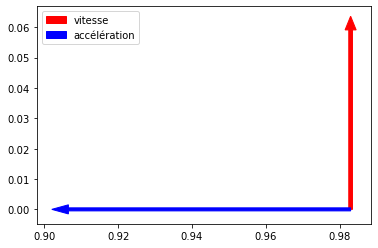

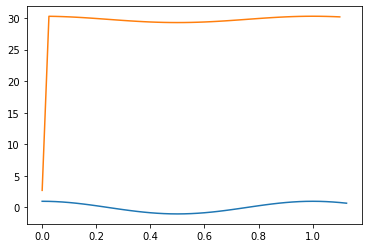

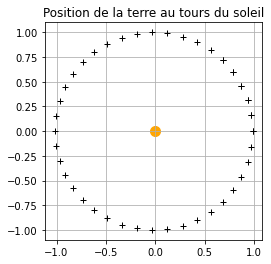

In [4]:
# Données astronomiques
# Terre
a = 1 # U.A
T_rev = 1 # ans
e = 0.017 # Excentricité S.U
N = 40 # positions tracées

t,M,u,theta,R,X,Y = calculate_trajectory()
vx,vy,v = calculate_speed(X,Y,t)
ax,ay = calculate_acceleration(vx,vy,t)

plot_arrows(X,Y,vx,vy,ax,ay,40)
plot_in_time(X,v,t)

plt.plot(X,Y,"+k")
plt.scatter([0],[0], s=100, c="orange")
plt.title("Position de la terre au tours du soleil")
plt.axis("square")
plt.grid()
plt.show()

Au point 40 vitesse 9.147973298891339 km/s


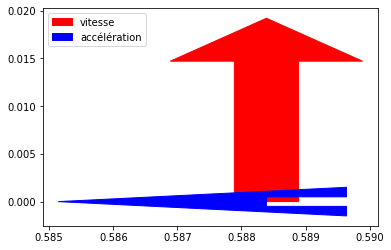

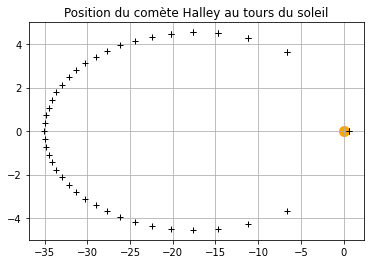

In [5]:
# Comète Halley
a = 17.83 # U.A
T_rev = 76.09 # ans
e = 0.967 # Excentricité S.U
N = 40 # positions tracées

t,M,u,theta,R,X,Y = calculate_trajectory()
vx,vy,v = calculate_speed(X,Y,t)
ax,ay = calculate_acceleration(vx,vy,t)

plot_arrows(X,Y,vx,vy,ax,ay,40)

plt.plot(X,Y,"+k")
plt.scatter([0],[0], s=100, c="orange")
plt.title("Position du comète Halley au tours du soleil")
#plt.axis("square")
plt.grid()
plt.show()